In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
file_path = "data/household_power_consumption.txt"

df = pd.read_csv(
    file_path,
    sep=';',
    dayfirst=True,
    na_values=['?', 'NA', 'nan', '']
)

df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [11]:
df['DateTime'] = pd.to_datetime(
    df['Date'] + ' ' + df['Time'],
    format='%d/%m/%Y %H:%M:%S'
)

df = df.set_index('DateTime').sort_index()
df.head(15)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,,,
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
2006-12-16 17:29:00,16/12/2006,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
2006-12-16 17:30:00,16/12/2006,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
2006-12-16 17:31:00,16/12/2006,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
2006-12-16 17:32:00,16/12/2006,17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 158.3+ MB


In [8]:
num_cols = [
    'Global_active_power', 'Global_reactive_power', 'Voltage',
    'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'
]

df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [9]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [10]:
df[num_cols] = df[num_cols].interpolate(method='time')

# На всякий случай: заполнение с предыдущего / следующего значения
df[num_cols] = df[num_cols].fillna(method='ffill').fillna(method='bfill')

df[num_cols].isna().sum()

C:\Users\letta\AppData\Local\Temp\ipykernel_14000\3933615170.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[num_cols] = df[num_cols].fillna(method='ffill').fillna(method='bfill')


Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [12]:
y = df['Global_active_power']

# Ресемплинг до ежедневного среднего
y_daily = y.resample('D').mean()

y_daily.head(), y_daily.shape

(DateTime
 2006-12-16    3.053475
 2006-12-17    2.354486
 2006-12-18    1.530435
 2006-12-19    1.157079
 2006-12-20    1.545658
 Freq: D, Name: Global_active_power, dtype: float64,
 (1442,))

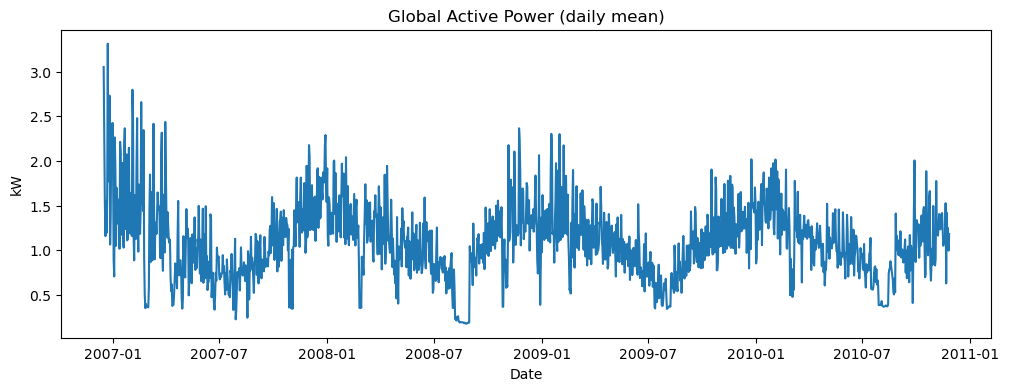

In [13]:
plt.figure(figsize=(12,4))
plt.plot(y_daily)
plt.title("Global Active Power (daily mean)")
plt.xlabel("Date")
plt.ylabel("kW")
plt.show()

In [14]:
months = y_daily.index.to_period('M')
last_month = months.max()
prev_month = last_month - 1

last_month, prev_month

(Period('2010-11', 'M'), Period('2010-10', 'M'))

In [15]:
mask_val = (months == last_month)
mask_test = (months == prev_month)
mask_train = (months < prev_month)

y_train = y_daily[mask_train]
y_test = y_daily[mask_test]
y_val  = y_daily[mask_val]

len(y_train), len(y_test), len(y_val)

(1385, 31, 26)

In [16]:
from statsmodels.tsa.stattools import adfuller

In [18]:
def adf_test(series, name="series"):
    result = adfuller(series.dropna())
    stat, pvalue = result[0], result[1]
    print(f"ADF test for {name}")
    print(f" Statistic: {stat:.4f}")
    print(f" p-value: {pvalue:.4f}")
    if pvalue < 0.05:
        print("  => Ряд можно считать стационарным (отклоняем H0)")
    else:
        print("  => Ряд НЕстационарен (не отклоняем H0)")
    print("-"*40)

adf_test(y_train, "y_train")

ADF test for y_train
 Statistic: -3.6015
 p-value: 0.0057
  => Ряд можно считать стационарным (отклоняем H0)
----------------------------------------


По результатам ADF-теста (p-value = 0.0057 < 0.05) ряд можно считать стационарным, поэтому дополнительно приводить его к стационарности не требуется.

In [19]:
from statsmodels.tsa.holtwinters import Holt
from sklearn.metrics import mean_absolute_error

In [20]:
holt_model = Holt(y_train).fit(optimized=True)

holt_model.params

{'smoothing_level': np.float64(0.4285716198763862),
 'smoothing_trend': np.float64(0.11199629303154818),
 'smoothing_seasonal': np.float64(nan),
 'damping_trend': nan,
 'initial_level': np.float64(3.0534747474747475),
 'initial_trend': np.float64(-0.6989886363636364),
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [21]:
n_test = len(y_test)
n_val = len(y_val)
n_steps = n_test + n_val

forecast = holt_model.forecast(steps=n_steps)

forecast_test = forecast.iloc[:n_test]
forecast_val = forecast.iloc[n_test:]

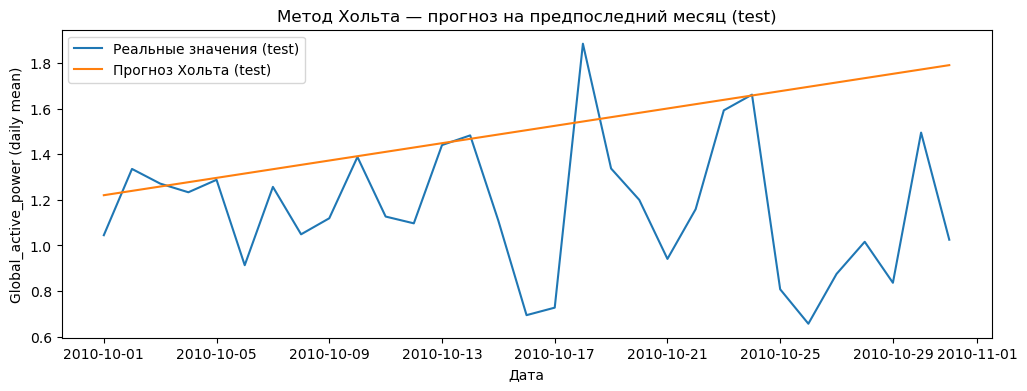

MAE на test (метод Хольта): 0.372399363524077


In [22]:
plt.figure(figsize=(12,4))
plt.plot(y_test.index, y_test, label="Реальные значения (test)")
plt.plot(y_test.index, forecast_test, label="Прогноз Хольта (test)")
plt.title("Метод Хольта — прогноз на предпоследний месяц (test)")
plt.xlabel("Дата")
plt.ylabel("Global_active_power (daily mean)")
plt.legend()
plt.show()

mae_test = mean_absolute_error(y_test, forecast_test)
print("MAE на test (метод Хольта):", mae_test)

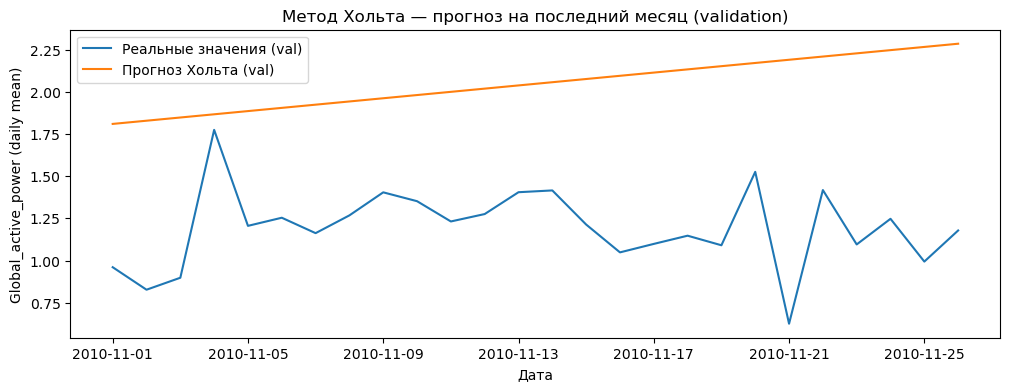

MAE на validation (метод Хольта): 0.850569793131089


In [23]:
plt.figure(figsize=(12,4))
plt.plot(y_val.index, y_val, label="Реальные значения (val)")
plt.plot(y_val.index, forecast_val, label="Прогноз Хольта (val)")
plt.title("Метод Хольта — прогноз на последний месяц (validation)")
plt.xlabel("Дата")
plt.ylabel("Global_active_power (daily mean)")
plt.legend()
plt.show()

mae_val = mean_absolute_error(y_val, forecast_val)
print("MAE на validation (метод Хольта):", mae_val)

### Arima

In [25]:
from statsmodels.tsa.arima.model import ARIMA

ARIMA(1,0,1):

p = 1 — 1 лаг авторегрессии

d = 0 — без дифференцирования (ряд уже стационарный)

q = 1 — 1 лаг скользящего среднего

In [26]:
arima_model = ARIMA(y_train, order=(1, 0, 1))
arima_fit = arima_model.fit()
arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     Global_active_power   No. Observations:                 1385
Model:                  ARIMA(1, 0, 1)   Log Likelihood                -355.159
Date:                 Sat, 29 Nov 2025   AIC                            718.317
Time:                         22:08:34   BIC                            739.251
Sample:                     12-16-2006   HQIC                           726.147
                          - 09-30-2010                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1112      0.084     13.166      0.000       0.946       1.277
ar.L1          0.9714      0.006    159.430      0.000       0.959       0.983
ma.L1         -0.7410      0.017    -43.171      0.000      -0.775      -0.707
sigma2         0.0977      0.003     35.892      0.000       0.092       0.103
===================================================================================
Ljung-Box (L1) (Q):                  19.23   Jarque-Bera (JB):               493.19
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.39   Skew:                             0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
n_test = len(y_test)
n_val = len(y_val)
n_steps = n_test + n_val

# Прогноз вперёд на n_steps дней
arima_forecast = arima_fit.forecast(steps=n_steps)

arima_forecast_test = arima_forecast.iloc[:n_test]
arima_forecast_val  = arima_forecast.iloc[n_test:]

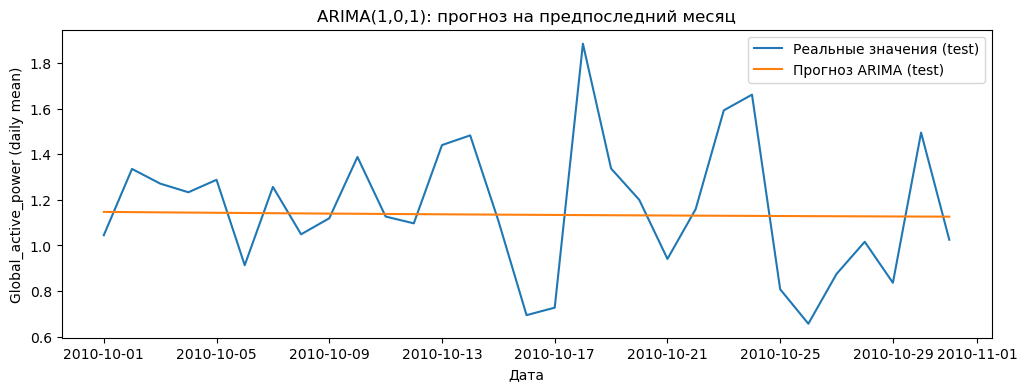

MAE на test (ARIMA): 0.22859768831519803


In [28]:
plt.figure(figsize=(12,4))
plt.plot(y_test.index, y_test, label="Реальные значения (test)")
plt.plot(y_test.index, arima_forecast_test, label="Прогноз ARIMA (test)")
plt.title("ARIMA(1,0,1): прогноз на предпоследний месяц")
plt.xlabel("Дата")
plt.ylabel("Global_active_power (daily mean)")
plt.legend()
plt.show()

mae_arima_test = mean_absolute_error(y_test, arima_forecast_test)
print("MAE на test (ARIMA):", mae_arima_test)

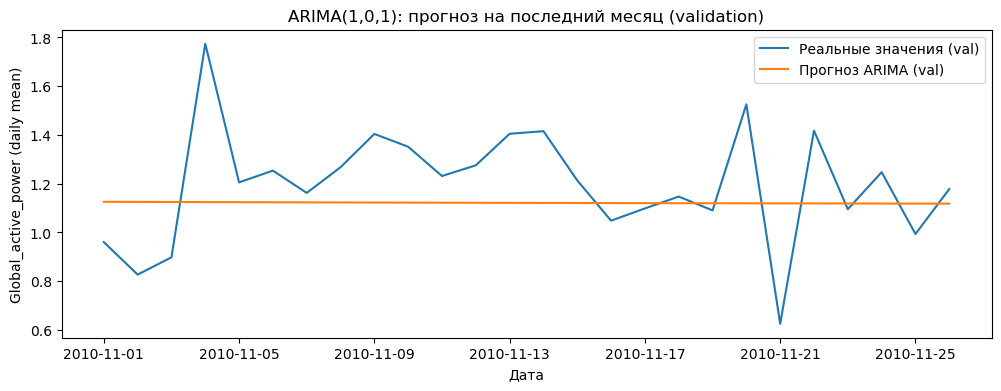

MAE на validation (ARIMA): 0.1871049609536439


In [29]:
plt.figure(figsize=(12,4))
plt.plot(y_val.index, y_val, label="Реальные значения (val)")
plt.plot(y_val.index, arima_forecast_val, label="Прогноз ARIMA (val)")
plt.title("ARIMA(1,0,1): прогноз на последний месяц (validation)")
plt.xlabel("Дата")
plt.ylabel("Global_active_power (daily mean)")
plt.legend()
plt.show()

mae_arima_val = mean_absolute_error(y_val, arima_forecast_val)
print("MAE на validation (ARIMA):", mae_arima_val)